In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,LabelBinarizer
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
df=pd.read_csv(r'ds_dataset_test.csv')

In [15]:
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(user_id                0
 total_stream           0
 normal_clips           0
 downloaded_clips       0
 shared_clips           0
 edited_clips           0
 avg_waiting_time       0
 days_active            0
 total_spent_minutes    0
 join_via               0
 days_in_premium        0
 churn_status           0
 dtype: int64,
 user_id                  int64
 total_stream           float64
 normal_clips           float64
 downloaded_clips       float64
 shared_clips           float64
 edited_clips           float64
 avg_waiting_time       float64
 days_active            float64
 total_spent_minutes    float64
 join_via                object
 days_in_premium          int64
 churn_status           float64
 dtype: object)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppDat

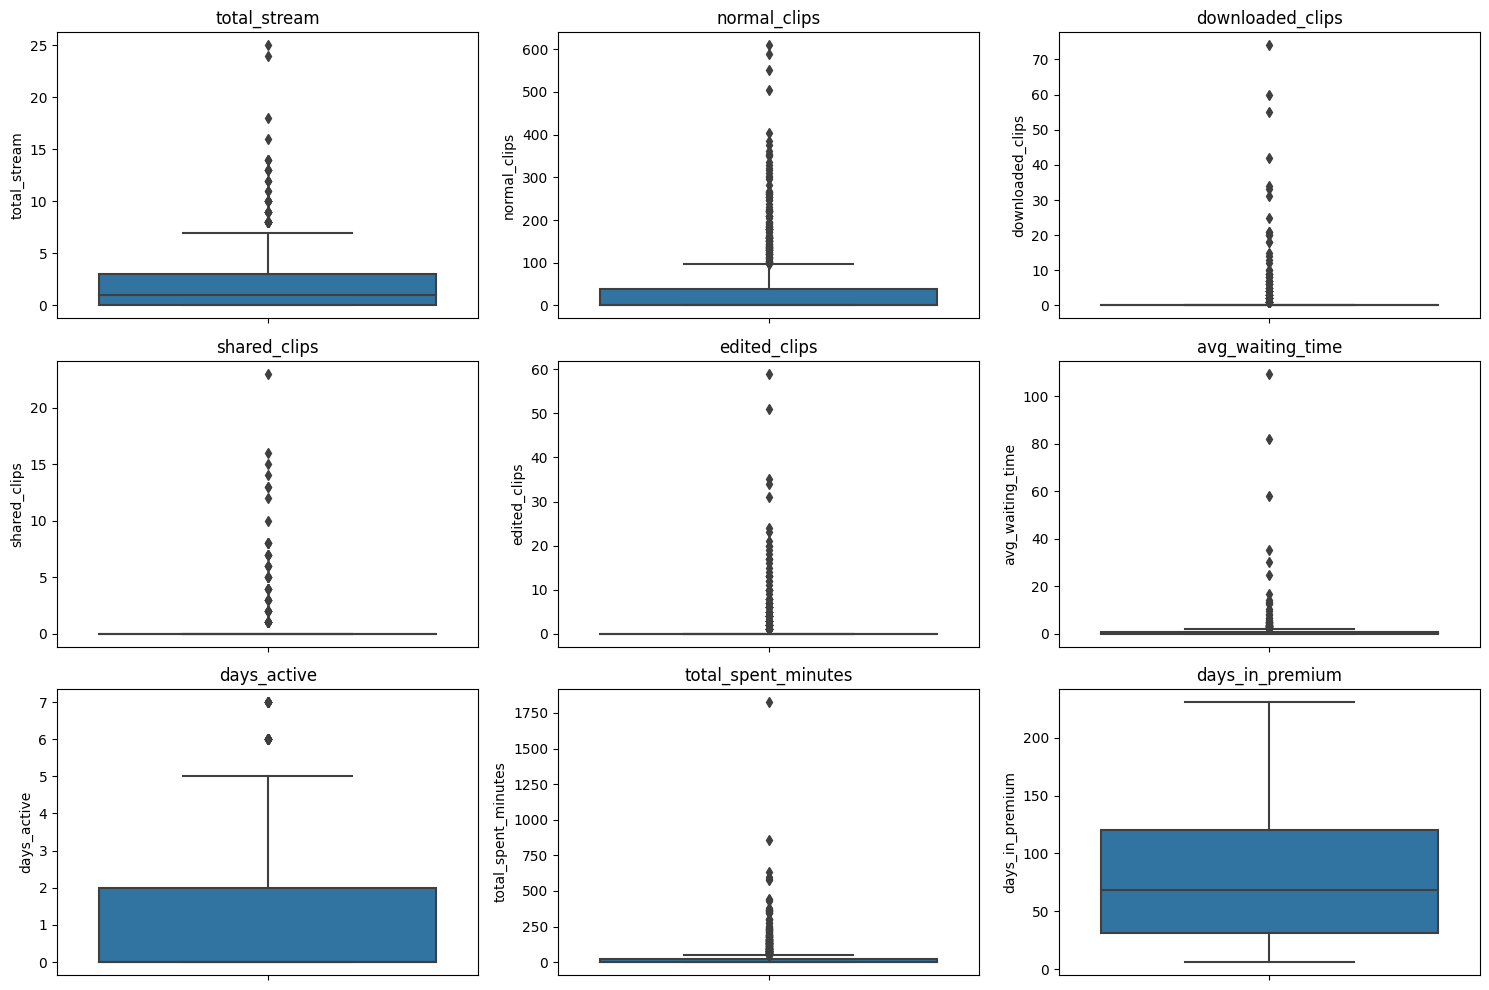

In [51]:
continuous_features = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 
    'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes', 'days_in_premium'
]

# Plot boxplots for each continuous feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

In [52]:


df_encoded = pd.get_dummies(df, columns=["join_via"], drop_first=True)

# Define the dependent variable (churn_status) and independent variables (features)
y = df_encoded["churn_status"]
X = df_encoded.drop(columns=["user_id "churn_status"","churn_status"])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
scores = cross_val_score(logistic_model, X, y, cv=5)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (379286645.py, line 5)

Accuracy: 0.95
ROC AUC: 0.43

Confusion Matrix:
[[191   0]
 [  9   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       191
         1.0       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200


Cross validation score:
[0.935 0.93  0.93  0.93  0.93 ]


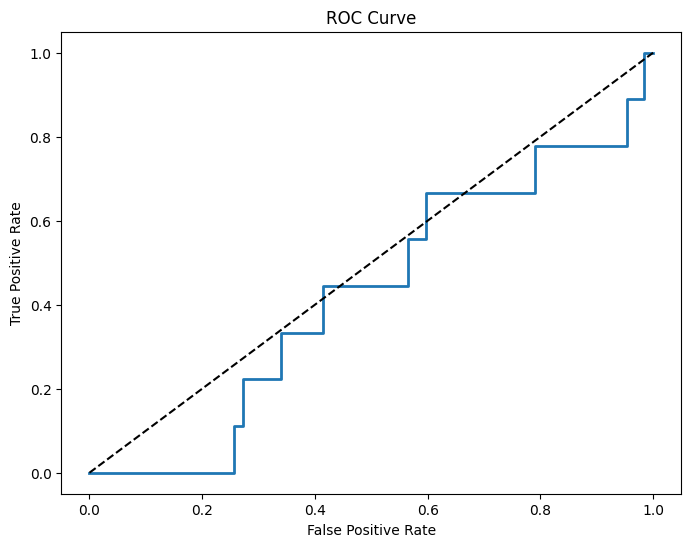

<Figure size 640x480 with 0 Axes>

In [7]:
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print("\nCross validation score:")
print(scores)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.savefig('ROCcurve.png')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

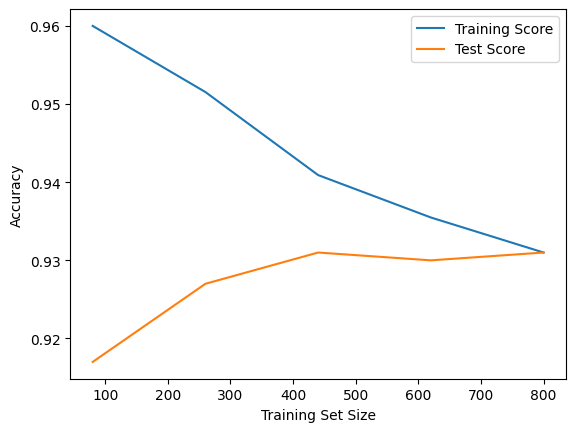

<Figure size 640x480 with 0 Axes>

In [8]:
#learning_curve
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('learningcurve.png')

In [9]:
coefficients = logistic_model.coef_[0]
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)
print(feature_coefficients)


                           Feature  Coefficient
12  join_via_mobile_Chrome_Android     0.311155
11                join_via_Desktop     0.194641
10            join_via_App_android     0.114855
14      join_via_mobile_Safari_IOS     0.003754
13      join_via_mobile_Chrome_IOS    -0.033116
4                     edited_clips    -0.109050
2                 downloaded_clips    -0.126038
15   join_via_mobile_other_Android    -0.145738
8                  days_in_premium    -0.173703
7              total_spent_minutes    -0.177883
5                 avg_waiting_time    -0.279206
9                 join_via_App_IOS    -0.301533
3                     shared_clips    -0.330729
0                     total_stream    -0.342372
6                      days_active    -0.463352
1                     normal_clips    -0.499489


<Axes: xlabel='Feature'>

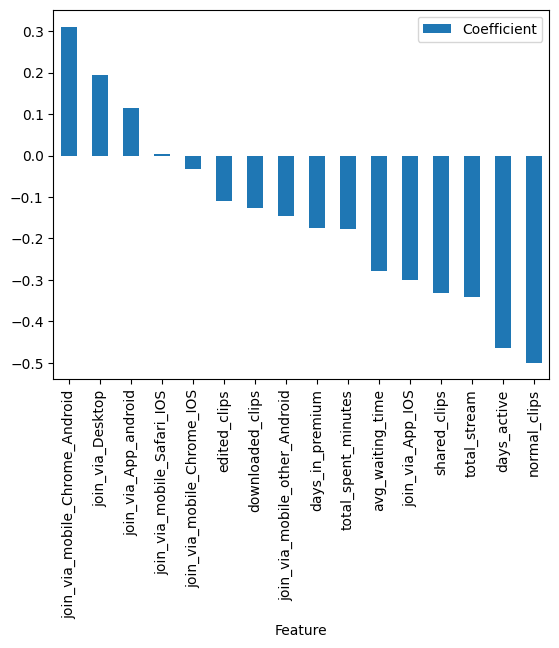

In [10]:
feature_coefficients.plot(x='Feature',y='Coefficient',kind='bar')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2132160626.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_2.days_active[(df_2["churn_status"] == 0) ],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2132160626.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_2.days_active[(df_2["churn_status"] == 1) ],


Text(0.5, 1.0, 'Distribution of days active by churn')

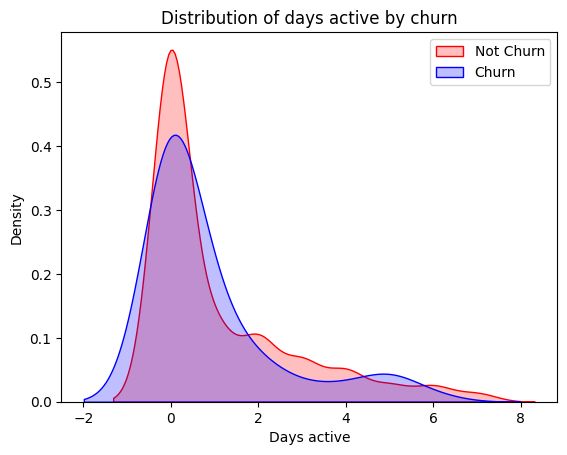

In [11]:
ax = sns.kdeplot(df_2.days_active[(df_2["churn_status"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df_2.days_active[(df_2["churn_status"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Days active')
ax.set_title('Distribution of days active by churn')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\937858495.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_2.normal_clips[(df_2["churn_status"] == 0) ],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\937858495.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_2.normal_clips[(df_2["churn_status"] == 1) ],


Text(0.5, 1.0, 'Distribution of days active by churn')

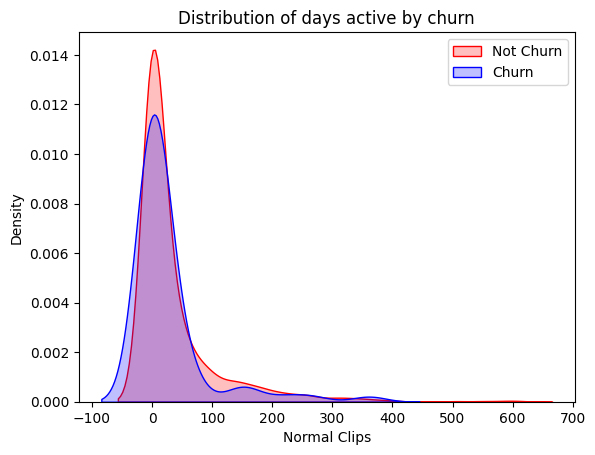

In [12]:
ax = sns.kdeplot(df_2.normal_clips[(df_2["churn_status"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df_2.normal_clips[(df_2["churn_status"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Normal Clips')
ax.set_title('Distribution of days active by churn')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2370695654.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_encoded.join_via_Desktop[(df_encoded["churn_status"] == 0) ],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2370695654.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_encoded.join_via_Desktop[(df_encoded["churn_status"] == 1) ],


Text(0.5, 1.0, 'Distribution of days active by churn')

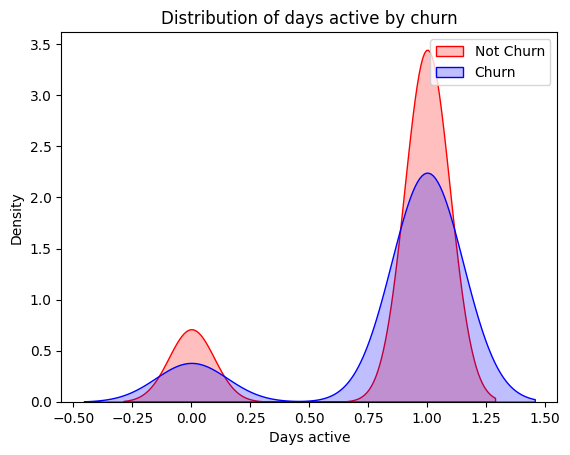

In [13]:
ax = sns.kdeplot(df_encoded.join_via_Desktop[(df_encoded["churn_status"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df_encoded.join_via_Desktop[(df_encoded["churn_status"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Days active')
ax.set_title('Distribution of days active by churn')

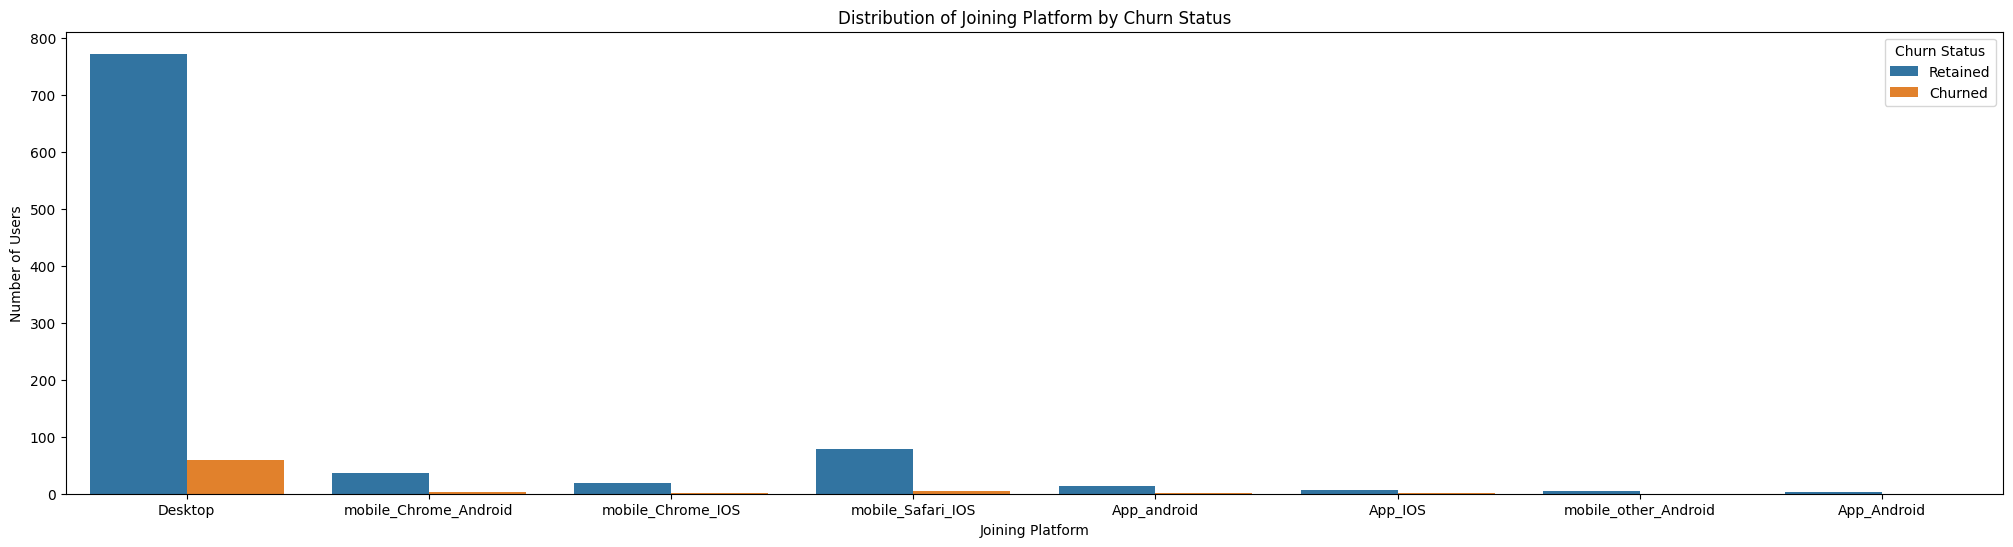

In [14]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='join_via', hue='churn_status')
plt.title('Distribution of Joining Platform by Churn Status')
plt.xlabel('Joining Platform')
plt.ylabel('Number of Users')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.show()

In [29]:
from imblearn.over_sampling import SMOTE

**# #### SMOTE technique**

In [20]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 60
Before OverSampling, counts of label '0': 740 

After OverSampling, the shape of train_X: (1480, 16)
After OverSampling, the shape of train_y: (1480,) 

After OverSampling, counts of label '1': 740
After OverSampling, counts of label '0': 740


In [36]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
smote_classification_report=classification_report(y_test, predictions)
print(smote_classification_report)


              precision    recall  f1-score   support

         0.0       0.60      0.49      0.54       280
         1.0       0.57      0.67      0.61       279

    accuracy                           0.58       559
   macro avg       0.58      0.58      0.57       559
weighted avg       0.58      0.58      0.57       559



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**# Using Over sampling technique:**

In [22]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df.churn_status == 0]
df_minority = df[df.churn_status == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=df_majority.shape[0],
                                 random_state=42)

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the distribution of the target variable after random oversampling
upsampled_churn_distribution = df_upsampled['churn_status'].value_counts(normalize=True)

upsampled_churn_distribution

churn_status
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [23]:
features_to_transform = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 'edited_clips',
    'avg_waiting_time', 'days_active', 'total_spent_minutes'
]

# Apply log transformation
for feature in features_to_transform:
    df_upsampled[feature] = np.log1p(df_upsampled[feature])  # log1p = log(x + 1)

# Display the first few rows after transformation
df_upsampled.head()

,user_id,total_stream,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,join_via,days_in_premium,churn_status
0,45745320,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,Desktop,98,0.0
1,36485256,1.609438,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,Desktop,36,0.0
2,52614000,2.708050,6.313548,2.772589,0.0,3.178054,0.866357,1.386294,4.9129,Desktop,84,0.0
3,43295328,0.693147,3.367296,0.000000,0.0,0.000000,0.634664,0.000000,0.0000,Desktop,120,0.0
5,52386672,1.098612,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,Desktop,92,0.0


In [24]:
df_encoded = pd.get_dummies(df_upsampled, columns=['join_via'], drop_first=True)

# Display the first few rows after one-hot encoding
df_encoded.head()

,user_id,total_stream,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,days_in_premium,churn_status,join_via_App_IOS,join_via_App_android,join_via_Desktop,join_via_mobile_Chrome_Android,join_via_mobile_Chrome_IOS,join_via_mobile_Safari_IOS,join_via_mobile_other_Android
0,45745320,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,98,0.0,False,False,True,False,False,False,False
1,36485256,1.609438,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,36,0.0,False,False,True,False,False,False,False
2,52614000,2.708050,6.313548,2.772589,0.0,3.178054,0.866357,1.386294,4.9129,84,0.0,False,False,True,False,False,False,False
3,43295328,0.693147,3.367296,0.000000,0.0,0.000000,0.634664,0.000000,0.0000,120,0.0,False,False,True,False,False,False,False
5,52386672,1.098612,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,92,0.0,False,False,True,False,False,False,False


In [25]:
features_to_scale = df_encoded.columns.difference(['user_id', 'churn_status'])

# Initialize the standard scaler
scaler = StandardScaler()

# Apply the scaler
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Display the first few rows after scaling
df_encoded.head()

,user_id,total_stream,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,days_in_premium,churn_status,join_via_App_IOS,join_via_App_android,join_via_Desktop,join_via_mobile_Chrome_Android,join_via_mobile_Chrome_IOS,join_via_mobile_Safari_IOS,join_via_mobile_other_Android
0,45745320,-0.953886,-0.735515,-0.304754,-0.200196,-0.362489,-0.674678,-0.707243,-0.617832,0.327905,0.0,-0.09599,-0.146265,0.439119,-0.211881,-0.132236,-0.269408,-0.046399
1,36485256,1.066407,-0.735515,-0.304754,-0.200196,-0.362489,-0.674678,-0.707243,-0.617832,-0.799191,0.0,-0.09599,-0.146265,0.439119,-0.211881,-0.132236,-0.269408,-0.046399
2,52614000,2.445471,2.434255,4.762490,-0.200196,4.678854,1.219352,1.473681,2.084956,0.073399,0.0,-0.09599,-0.146265,0.439119,-0.211881,-0.132236,-0.269408,-0.046399
3,43295328,-0.083793,0.955064,-0.304754,-0.200196,-0.362489,0.712825,-0.707243,-0.617832,0.727842,0.0,-0.09599,-0.146265,0.439119,-0.211881,-0.132236,-0.269408,-0.046399
5,52386672,0.425178,-0.735515,-0.304754,-0.200196,-0.362489,-0.674678,-0.707243,-0.617832,0.218831,0.0,-0.09599,-0.146265,0.439119,-0.211881,-0.132236,-0.269408,-0.046399


In [32]:
X = df_encoded.drop(columns=['user_id', 'churn_status'])
y = df_encoded['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
over_classification_rep = classification_report(y_test, y_pred)

accuracy, roc_auc, 
print(over_classification_rep)

              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58       280
         1.0       0.59      0.66      0.62       279

    accuracy                           0.60       559
   macro avg       0.60      0.60      0.60       559
weighted avg       0.60      0.60      0.60       559



In [49]:
df_majority = df[df.churn_status == 0]
df_minority = df[df.churn_status == 1]

# Random undersampling of the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,
                                    n_samples=df_minority.shape[0],
                                    random_state=42)

# Combine the undersampled majority class with the minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Check the distribution of the target variable after random undersampling
undersampled_churn_distribution = df_undersampled['churn_status'].value_counts(normalize=True)

undersampled_churn_distribution

churn_status
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [50]:
features_to_transform = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 
    'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes'
]

# Preprocessing steps

# Apply log transformation
for feature in features_to_transform:
    df_undersampled[feature] = np.log1p(df_undersampled[feature])

# One-hot encode the 'join_via' feature
df_undersampled_encoded = pd.get_dummies(df_undersampled, columns=['join_via'], drop_first=True)

# Scale the features using standard scaler
features_to_scale = df_undersampled_encoded.columns.difference(['user_id', 'churn_status'])
scaler = StandardScaler()
df_undersampled_encoded[features_to_scale] = scaler.fit_transform(df_undersampled_encoded[features_to_scale])

# Splitting the data into training and testing sets
X_undersampled = df_undersampled_encoded.drop(columns=['user_id', 'churn_status'])
y_undersampled = df_undersampled_encoded['churn_status']

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg_undersampled = LogisticRegression(max_iter=1000, random_state=42)
logreg_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predict on the testing set
y_pred_undersampled = logreg_undersampled.predict(X_test_undersampled)
y_prob_undersampled = logreg_undersampled.predict_proba(X_test_undersampled)[:, 1]
under_classification_rep = classification_report(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [300, 559]

In [47]:
print("Accuracy:",accuracy)
print("\nROC AUC",roc_auc)
print("\nUnder sampling technique:")
print(under_classification_rep)
print("\nOver sampling technique:")
print(over_classification_rep)
print("\nSMOTE sampling technique:")
print(smote_classification_report)

ValueError: Found input variables with inconsistent numbers of samples: [300, 559]

**## Z-score**

In [40]:
from scipy.stats import zscore

# Reload the dataset
dataset = pd.read_csv('ds_dataset_test.csv')

# Continuous features for which we'll check for outliers
continuous_features = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 
    'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes', 'days_in_premium'
]

# Calculate Z-scores for continuous features
z_scores = np.abs(zscore(dataset[continuous_features]))

# Define a threshold to identify an outlier
threshold = 3

# Get boolean array indicating the presence of outliers
outliers = (z_scores > threshold)

# Display the number of outliers for each feature
num_outliers = pd.DataFrame(outliers, columns=continuous_features).sum()

def cap_and_replace_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping
    data.loc[data[feature] > upper_bound, feature] = upper_bound
    data.loc[data[feature] < lower_bound, feature] = lower_bound
    
    # Replacing with median
    median_value = data[feature].median()
    data.loc[(data[feature] == upper_bound) | (data[feature] == lower_bound), feature] = median_value

# Apply the function to each continuous feature
for feature in continuous_features:
    cap_and_replace_outliers(dataset, feature)

# Display the first few rows of the dataset after handling outliers
dataset.head()


,user_id,total_stream,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,join_via,days_in_premium,churn_status
0,45745320,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Desktop,98.0,0.0
1,36485256,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Desktop,36.0,0.0
2,52614000,1.0,0.0,0.0,0.0,0.0,1.378232,3.0,0.0,Desktop,84.0,0.0
3,43295328,1.0,28.0,0.0,0.0,0.0,0.886389,0.0,0.0,Desktop,120.0,0.0
4,70911240,1.0,28.0,0.0,0.0,0.0,0.770370,0.0,0.0,Desktop,16.0,1.0


In [42]:
for feature in features_to_transform:
    dataset[feature] = np.log1p(dataset[feature])

# One-hot encode the 'join_via' feature
dataset_encoded = pd.get_dummies(dataset, columns=['join_via'], drop_first=True)

# Scale the features using standard scaler
features_to_scale = dataset_encoded.columns.difference(['user_id', 'churn_status'])
scaler = StandardScaler()
dataset_encoded[features_to_scale] = scaler.fit_transform(dataset_encoded[features_to_scale])

# Splitting the data into training and testing sets
X = dataset_encoded.drop(columns=['user_id', 'churn_status'])
y = dataset_encoded['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg_processed = LogisticRegression(max_iter=1000, random_state=42)
logreg_processed.fit(X_train, y_train)

# Predict on the testing set
y_pred_processed = logreg_processed.predict(X_test)
y_prob_processed = logreg_processed.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_processed = accuracy_score(y_test, y_pred_processed)
roc_auc_processed = roc_auc_score(y_test, y_prob_processed)
classification_rep_processed = classification_report(y_test, y_pred_processed)

accuracy_processed, roc_auc_processed,
print(classification_rep_processed)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       278
         1.0       0.00      0.00      0.00        22

    accuracy                           0.93       300
   macro avg       0.46      0.50      0.48       300
weighted avg       0.86      0.93      0.89       300



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo